In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('/content/parkingLot (1).csv')
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%m-%Y %H:%M', dayfirst=True)
data = data[data['camera_id'] == 1]
data = data.sort_values('timestamp')
data['date'] = data['timestamp'].dt.date
daily_counts = data.groupby('date').size()


In [3]:
train_size = int(len(daily_counts) * 0.8)
train, test = daily_counts.iloc[:train_size], daily_counts.iloc[train_size:]

model = SARIMAX(daily_counts, order=(1, 1, 1), seasonal_order=(1, 1, 0, 7), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
test_forecast = model_fit.predict(start=test.index[0], end=test.index[-1])

mae = mean_absolute_error(test, test_forecast)
mape = np.mean(np.abs((test - test_forecast) / test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

last_date = daily_counts.index[-1]
future_dates = pd.date_range(start=last_date, periods=7, freq='D').date
forecast = model_fit.forecast(steps=7)
forecast_df = pd.DataFrame({'date': future_dates, 'forecast': forecast})
print("Forecast for the next 7 days:")
print(forecast_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE: 53.7537
MAPE: 6.22%
Forecast for the next 7 days:
                  date    forecast
2024-11-14  2024-11-13  747.584542
2024-11-15  2024-11-14  856.466087
2024-11-16  2024-11-15  874.855680
2024-11-17  2024-11-16  879.919019
2024-11-18  2024-11-17  863.819281
2024-11-19  2024-11-18  846.175554
2024-11-20  2024-11-19  851.339951


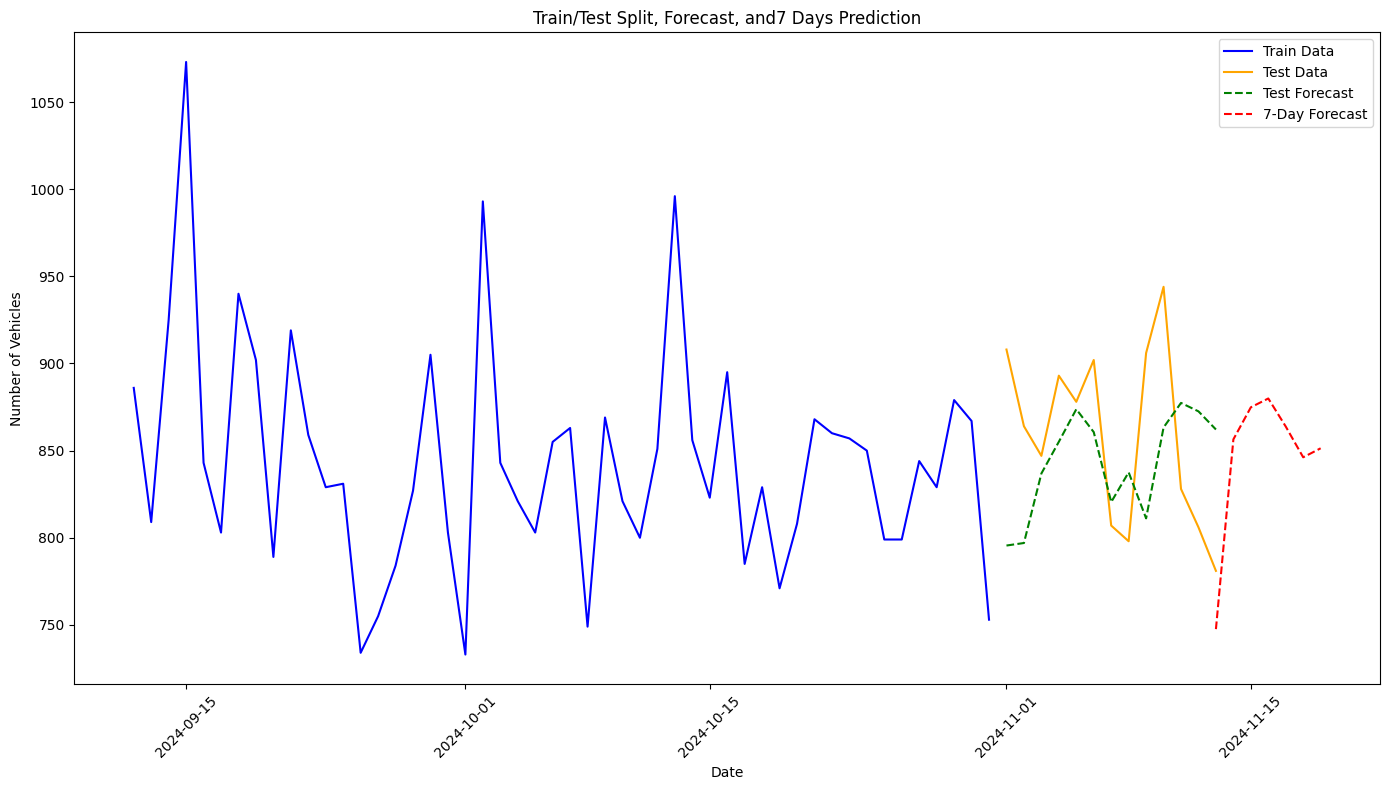

In [4]:
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, test_forecast, label='Test Forecast', color='green', linestyle='--')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='7-Day Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Train/Test Split, Forecast, and7 Days Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()